In [1]:
# Importing files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

aapl = pd.read_csv('data/aapl_ohlc.csv', header=0, index_col='Date', parse_dates=True)

In [2]:
# Just some general info on AAPL before delving into visualization
display(aapl.index)
display(aapl.columns)
display(aapl.describe())
display(aapl.resample('M').mean().tail())

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=2830, freq=None)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,2830.000000,2830.000000,2830.000000,2830.000000,2.830000e+03,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2.830000e+03
mean,247.160512,249.603774,244.377169,247.054279,2.900446e+07,0.010767,1.002120,64.521283,65.096799,63.892906,64.512719,1.247352e+08
std,170.340590,171.684048,168.711992,170.202391,1.831010e+07,0.160208,0.112787,43.274181,43.545172,42.994156,43.282892,9.906652e+07
min,73.420000,73.980000,72.600000,73.230000,5.624800e+06,0.000000,1.000000,9.435493,9.507461,9.330112,9.411076,1.147592e+07
25%,113.862500,115.000000,112.705000,113.927500,1.589840e+07,0.000000,1.000000,23.821665,24.015400,23.392428,23.778934,5.036141e+07
50%,163.520000,165.330000,160.440000,162.980000,2.448481e+07,0.000000,1.000000,57.645805,58.491544,57.052814,57.743997,9.986585e+07
75%,374.250000,378.927500,370.297500,374.855000,3.685698e+07,0.000000,1.000000,97.298248,98.113024,96.553987,97.584609,1.673472e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,175.110000,177.200000,174.860000,176.420000,8.432424e+08


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-08-31,159.032727,160.207627,157.855005,159.029091,2.801595e+07,0.028636,1.0,158.860182,160.033553,157.683690,158.856375,2.801595e+07
2017-09-30,158.133000,158.869445,156.446250,157.606500,3.347970e+07,0.000000,1.0,158.133000,158.869445,156.446250,157.606500,3.347970e+07
2017-10-31,157.355682,158.586791,156.670223,157.811627,2.255160e+07,0.000000,1.0,157.355682,158.586791,156.670223,157.811627,2.255160e+07
2017-11-30,172.433750,173.287235,170.823795,172.214500,2.787335e+07,0.000000,1.0,172.433750,173.287235,170.823795,172.214500,2.787335e+07
2017-12-31,171.722000,172.885935,170.848500,171.893100,2.592800e+07,0.000000,1.0,171.722000,172.885935,170.848500,171.893100,2.592800e+07


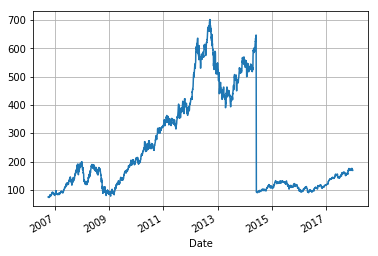

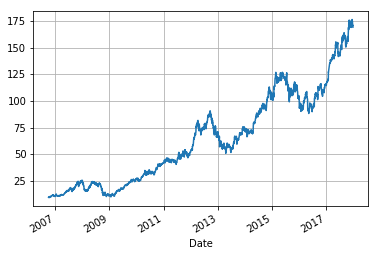

In [3]:
# Displaying Close prices in Time Series chart
aapl['Close'].plot(grid=True)
plt.show()
aapl['Adj. Close'].plot(grid=True)
plt.show()

In [4]:
# Get sub-dataframe containing adjusted close prices
daily_close = aapl[['Adj. Close']]

# Daily percentage change from previous price
daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
daily_log_returns = np.log(daily_close.pct_change() + 1)

display(daily_log_returns.tail())

,Adj. Close
Date,
2017-12-22,0.000000
2017-12-26,-0.025697
2017-12-27,0.000176
2017-12-28,0.002810
2017-12-29,-0.010873


In [19]:
# Business months sampling -> take last observation
monthly = aapl.resample('BM').apply(lambda x: x[-1])
monthly.pct_change().tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-08-31,0.091661,0.094392,0.103625,0.101780,0.359878,NaN,0.0,0.096090,0.098833,0.108103,0.106251,0.359878
2017-09-29,-0.063737,-0.063153,-0.070223,-0.060244,-0.021047,NaN,0.0,-0.063737,-0.063153,-0.070223,-0.060244,-0.021047
2017-10-31,0.095881,0.100694,0.098289,0.096808,0.371981,NaN,0.0,0.095881,0.100694,0.098289,0.096808,0.371981
2017-11-30,0.015068,0.014678,0.008985,0.016623,0.132424,NaN,0.0,0.015068,0.014678,0.008985,0.016623,0.132424
2017-12-29,0.000528,-0.009004,0.004631,-0.015246,-0.361658,NaN,0.0,0.000528,-0.009004,0.004631,-0.015246,-0.361658


In [18]:
# Change data to quarters
quarters = aapl.resample('4M').mean()
quarters.pct_change().tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-10-31,0.076115,0.073984,0.077806,0.076023,-0.088493,0.011765,0.0,0.084134,0.081989,0.085837,0.084043,-0.088493
2017-02-28,0.097645,0.098483,0.099020,0.099653,-0.128623,1.098765,0.0,0.105546,0.106389,0.106935,0.107570,-0.128623
2017-06-30,0.228928,0.226379,0.226589,0.225402,-0.148060,-0.479498,0.0,0.235575,0.233014,0.233215,0.232024,-0.148060
2017-10-31,0.067476,0.068514,0.066832,0.067742,0.005713,0.023810,0.0,0.073002,0.074044,0.072358,0.073272,0.005713
2018-02-28,0.104654,0.103601,0.104664,0.104195,0.030172,-1.000000,0.0,0.105986,0.104933,0.105997,0.105529,0.030172


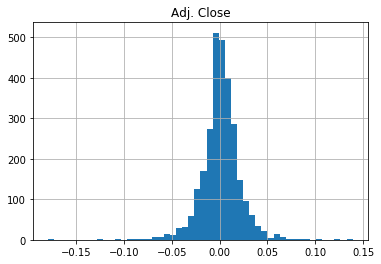

,Adj. Close
count,2829.000000
mean,0.001215
std,0.020002
min,-0.179195
25%,-0.007882
50%,0.000985
75%,0.011298
max,0.139050


In [33]:
# Instead of pct_change(), use shift()
daily_pct_change = daily_close / daily_close.shift(1) - 1
daily_pct_change.hist(bins=50)
plt.show()
daily_pct_change.describe()

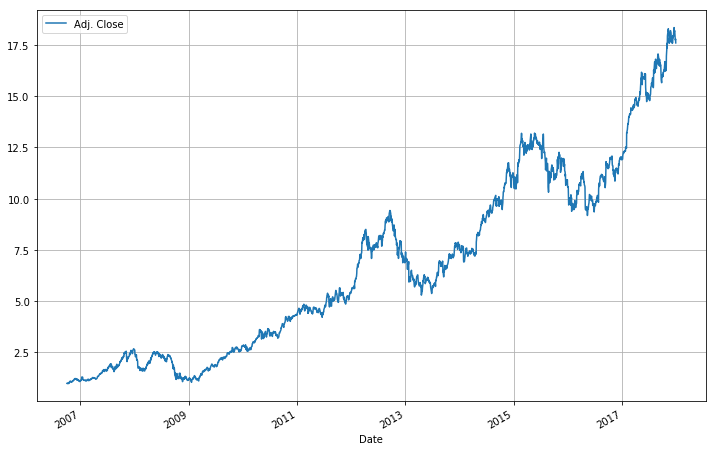

,Adj. Close
Date,
2017-12-22,18.191261
2017-12-26,17.729749
2017-12-27,17.732868
2017-12-28,17.782761
2017-12-29,17.590464


In [41]:
# Cumulative daily rate of return
cum_daily_r = (1 + daily_pct_change).cumprod()
cum_daily_r.plot(figsize=(12,8))
plt.grid()
plt.show()
display(cum_daily_r.tail())

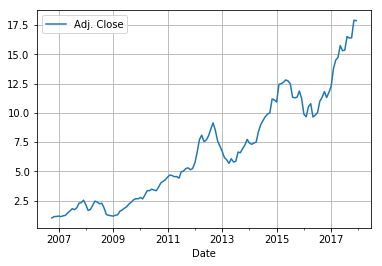

,Adj. Close
Date,
2017-08-31,16.512187
2017-09-30,16.382270
2017-10-31,16.403591
2017-11-30,17.900685
2017-12-31,17.867278


In [43]:
cum_monthly_r = cum_daily_r.resample('M').mean()
cum_monthly_r.plot(figsize=(6,4))
plt.grid()
plt.show()
display(cum_monthly_r.tail())

In [46]:
stock_data = pd.read_csv('data/faang_stock.csv', header=0, index_col='Date', parse_dates=True)
display(stock_data)

,Ticker,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,,
2006-10-02,AAPL,75.100,75.870,74.300,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,AAPL,74.450,74.950,73.190,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,AAPL,74.100,75.462,73.160,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,AAPL,74.530,76.160,74.130,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,AAPL,74.420,75.040,73.810,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0
2006-10-09,AAPL,73.800,75.080,73.530,74.63,15650800.0,0.0,1.0,9.484329,9.648826,9.449630,9.590995,109555600.0
2006-10-10,AAPL,74.540,74.580,73.080,73.81,18985300.0,0.0,1.0,9.579429,9.584569,9.391799,9.485614,132897100.0
2006-10-11,AAPL,73.420,73.980,72.600,73.23,20423400.0,0.0,1.0,9.435493,9.507461,9.330112,9.411076,142963800.0
2006-10-12,AAPL,73.610,75.390,73.600,75.26,21173400.0,0.0,1.0,9.459911,9.688666,9.458626,9.671959,148213800.0
